In [16]:
from sklearn.linear_model import LinearRegression as lr
from sklearn.preprocessing import StandardScaler as ss
from sklearn import metrics
import pandas as pd
import json
from dbanalysis import stop_tools
routes = json.loads(open('/home/student/dbanalysis/dbanalysis/resources/trimmed_routes.json','r').read())
route = routes['15'][1]
models = []
scalers = []
all_dummies = []

In [17]:
from sklearn.neural_network import MLPRegressor as mlp
from sklearn.preprocessing import StandardScaler as ss
features = ['rain','temp','day','hour']
y_scalers=[]
from sklearn.preprocessing import MinMaxScaler as mms
route=routes['15'][1]
for i in range(1,len(route)-1):
    stopA = str(route[i])
    stopB = str(route[i+1])
    print('Building for',stopA,'to',stopB)

    df = stop_tools.stop_data(stopA,stopB)
    df = df[df['traveltime']>df['traveltime'].quantile(0.05)]
    test = df[df['year']==2017]
    df = df[df['year']==2016]
    df['traveltime'] = df['actualtime_arr_to'] - df['actualtime_arr_from']
    
    scaler = ss()
    X = scaler.fit_transform(df[features])
    y_scaler = ss()
    Y = y_scaler.fit_transform(df['traveltime'].values.reshape(-1,1))
    model = mlp().fit(X,Y)
    preds = model.predict(scaler.transform(test[features]))
    preds = y_scaler.inverse_transform(preds)
    from sklearn import metrics
    print('model for:',stopA,'to',stopB)
    print('min pred:',preds.min())
    print('mean pred:',preds.mean())
    print('max pred:',preds.max())
    print('Mape:',((abs(test['traveltime']-preds)/test['traveltime'])*100).mean())
    print('r2:',metrics.r2_score(test['traveltime'],preds))
    print('mae:',metrics.mean_absolute_error(test['traveltime'],preds),'\n\n')
    models.append(model)
    scalers.append(scaler)
    y_scalers.append(y_scaler)
    del(df)


Building for 6318 to 6319


/home/student/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/student/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


model for: 6318 to 6319
min pred: 21.96229341916214
mean pred: 24.97291700902435
max pred: 29.822342009560856
Mape: 18.20940558026046
r2: -0.0018792299934342616
mae: 5.084066377656755 


Building for 6319 to 7246
model for: 6319 to 7246
min pred: 30.65172051608894
mean pred: 41.35530666918819
max pred: 61.46799309328388
Mape: 27.68637284780472
r2: 0.006174968127420466
mae: 11.330500662919402 


Building for 7246 to 6320
model for: 7246 to 6320
min pred: 70.84090879297074
mean pred: 88.60813866643085
max pred: 112.54282943529644
Mape: 19.11863735605426
r2: -0.018864570364360178
mae: 19.84433706535543 


Building for 6320 to 4594
model for: 6320 to 4594
min pred: 20.81468444943252
mean pred: 88.50153398751608
max pred: 198.05608806449064
Mape: 26.711806107490673
r2: 0.18693445300446843
mae: 25.27259807322866 


Building for 4594 to 4595
model for: 4594 to 4595
min pred: 68.41431366870276
mean pred: 92.99782510848735
max pred: 103.30830986539564
Mape: 16.305070889071043
r2: 0.052498525938

/home/student/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


model for: 4495 to 7581
min pred: 159.11285401471287
mean pred: 269.89972220534224
max pred: 343.66120588975014
Mape: 53.97891763997116
r2: -0.4912360630641257
mae: 86.6378176702028 


Building for 7581 to 1283
model for: 7581 to 1283
min pred: 84.88177142584277
mean pred: 135.0042687732799
max pred: 186.3456094978681
Mape: 21.303054819178627
r2: 0.23654580733692931
mae: 28.34643048822325 


Building for 1283 to 7579
model for: 1283 to 7579
min pred: 69.4809887530887
mean pred: 123.31790404281956
max pred: 166.70981218196084
Mape: 22.611960622828246
r2: 0.18758137138275044
mae: 26.616471806414832 


Building for 7579 to 1285
model for: 7579 to 1285
min pred: 4.431738728992968
mean pred: 149.63236558603398
max pred: 235.70565160237442
Mape: 29.12376564873218
r2: -0.09153915112118316
mae: 35.62937680715709 


Building for 1285 to 1016
model for: 1285 to 1016
min pred: 47.843906882614036
mean pred: 153.91084652999032
max pred: 215.34480543655286
Mape: 24.222312492126903
r2: 0.139316764357

In [22]:
def get_merged(stop):
    route = routes['15'][1][1:]
    begins = stop_tools.stop_data(str(route[0]),str(route[1]))
    begins = begins[begins['year']==2017]
    ends = stop_tools.stop_data(str(route[int(stop)]),str(route[int(stop)+1]))
    ends = ends[ends['year']==2017]
    ends['end'] = ends['actualtime_arr_to']
    
    merged = pd.merge(begins,ends[['tripid','dayofservice','routeid','end']], on=['tripid','dayofservice','routeid'])
    merged = merged[merged['traveltime']>0]
    return merged

In [23]:
def run_to_stop(number,verbose=False):
    features = ['rain','temp','day','hour']
    import copy
    global route
    stop = str(route[number])
    index = 0
    merged = get_merged(number)
    df = copy.deepcopy(merged)
    for i,model in enumerate(models):
        
        index+=1
        cur_stop = route[index]
        if cur_stop == route[number+1]:
            break
        X=copy.deepcopy(df[features])
        X = scalers[i].transform(X)
        traveltime = model.predict(X)
        traveltime = y_scalers[i].inverse_transform(traveltime)
        #print(traveltime.mean())
        df['actualtime_arr_from'] = df['actualtime_arr_from'] + traveltime
        df = df[[i for i in df.columns if i[0:4] != 'hour']]
        df['hour'] = (df['actualtime_arr_from'] //3600).astype('int64')
        #arr.append(copy.deepcopy(df))

        
    real_traveltimes = merged['end'] - merged['actualtime_arr_from']

    pred_traveltimes = df['actualtime_arr_from'] - merged['actualtime_arr_from']
    if verbose:
        print(df['actualtime_arr_from'].mean())
        print('MAE:',metrics.mean_absolute_error(real_traveltimes,pred_traveltimes))
        print('MAPE:',((abs(real_traveltimes-pred_traveltimes)/real_traveltimes)*100).mean())
        print('r2:',metrics.r2_score(real_traveltimes,pred_traveltimes))
    return metrics.r2_score(real_traveltimes,pred_traveltimes),((abs(real_traveltimes-pred_traveltimes)/real_traveltimes)*100).mean()

In [24]:
len(route)

71

In [25]:

MAPES = []
r2s = []
import time
t = time.time()
for i in range(1,67):
    print(i)
    r2,MAPE = run_to_stop(i,verbose=False)
    r2s.append(r2)
    MAPES.append(MAPE)
print(time.time()-t)



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
265.7088363170624


In [29]:
sum(MAPES)/len(MAPES)

12.487560451006111

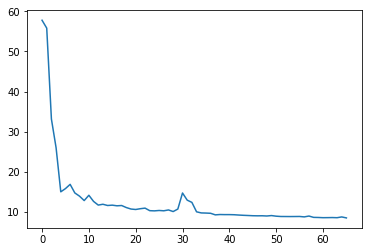

In [30]:
from matplotlib import pyplot as plt
plt.plot(range(len(MAPES)),MAPES)
plt.show()

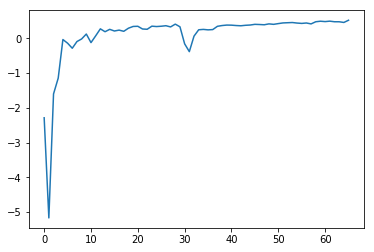

In [31]:
from matplotlib import pyplot as plt
plt.plot(range(len(r2s)),r2s)
